In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

%matplotlib inline

#Background Information

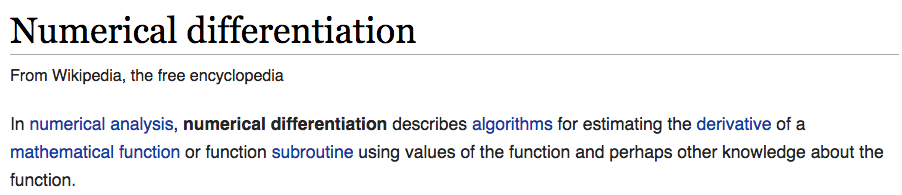

In [9]:
from IPython.display import Image
Image(filename= 'differentiation.png')

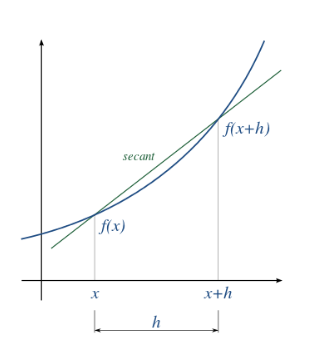

In [8]:
Image(filename='wiki2.png')

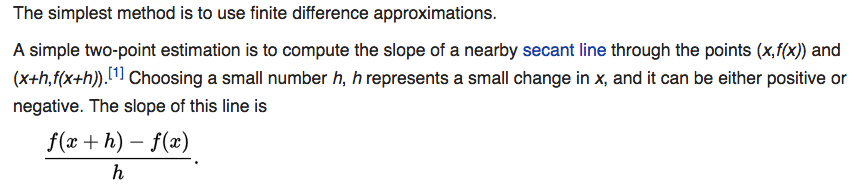

In [7]:
Image(filename= 'wiki.png')

# Gradient Descent Generally
Intuitively, you can think of the gradient as the answer to the following question: for each parameter, what would happen to the loss if I held everything else constant, and twiddled just this one parameter a little bit?

Numerical differentiation is the literal instantiation of this idea: for each parameter, we calculate the loss, then we twiddle each parameter just a little bit (by delta), and the recalculate the loss. We will set the default delta to 0.000001. 

p(instance i = class k) = exp( s_ik ) / sum_j exp( s_ij ) 
   + here s_ij is the score of the i'th instance on the j'th class)
   + then calculate L_i as the log of the probability of the correct class
   + Note: you should be careful about numerical underflow! To help combat that, you should use the log-sum-exp trick (or the exp-normalize trick):

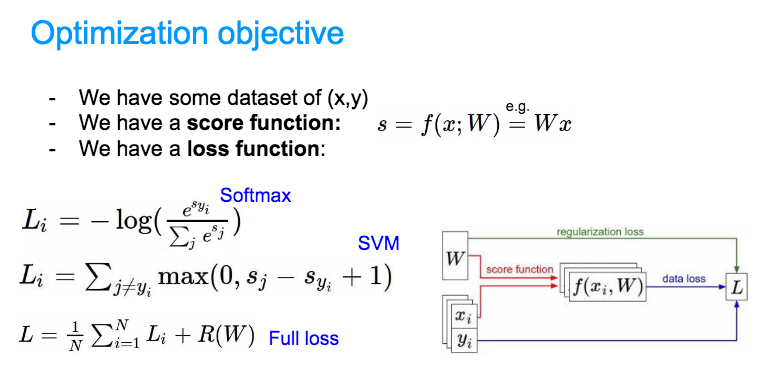

In [11]:
Image(filename='alg.png')

#Importing Data

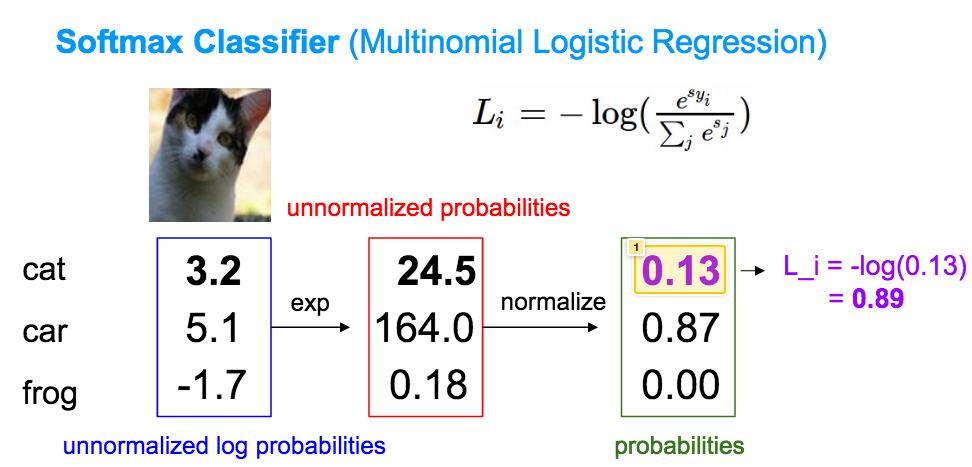

In [47]:
Image(filename='softmax2.png')

#Implementation

In [3]:
# =============================================
#
# load cifar-10-small and project down
#
 
def unpickle( file ):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict
 
data = unpickle( '../[2]Perceptron/cifar-10-batches-py/data_batch_1' )
 
features = data['data']
labels = data['labels']
labels = np.atleast_2d( labels ).T
 
N = 1000
D = 10
 
# only keep N items
features = features[ 0:N, : ] 
labels = labels[ 0:N, : ]
 
# project down into a D-dimensional space
features = np.dot( features, np.random.randn( 3072, D) )
 
# whiten our data - zero mean and unit standard deviation
features = (features - np.mean(features, axis=0)) / np.std(features, axis=0)

#weights = np.random.rand(10,10)
delta = .00201
stepSize = 0.1
#numberOfEpochs = 10

In [27]:
# MAIN CODE

def score(weights):
    return np.dot(features,weights)

def softmax(weights):
    scores = score(weights)
    numerator = np.exp(scores)
    probs = np.divide(numerator, np.atleast_2d(np.sum(numerator,axis=1)* 1.0 ).T)
    L_is = -np.log(probs[range(len(labels)), labels.T].T)
    return L_is

def testAccuracy(weights):
    predictions = np.atleast_2d(np.argmax(features.dot(weights),axis=1)).T
    return np.mean(predictions==labels)


In [28]:
# Numerical Differentiation

#JITTER TIME
def getGradientAndLoss(weights):
    gradient = np.zeros((10,10))
    originalLoss = np.mean(softmax(weights))
    #print 'loss ', originalLoss

    for r in range (0,len(weights),1):
        for c in range(0,len(weights[0]),1):
            weights [r][c] += delta # Jitter
            newLoss = np.mean(softmax(weights))
            weights [r][c] -= delta # Return to original value
            gradient[r][c] = (newLoss - originalLoss ) / delta
            #print 'rc ', r, c, ' weight: ', weights [r][c], 'new loss: ', newLoss, originalLoss, gradient[r][c]
    
    #finalLoss = np.mean(softmax())
    
    return gradient #, finalLoss


def epoch(weights):
    #gradient, nextLoss = getGradientAndLoss(weights)
    gradient = getGradientAndLoss(weights)
    change = (stepSize * gradient)
    #weights -= change
    updatedWeights = weights - change
    return updatedWeights
    
def train(numberOfEpochs):
    weights = np.random.rand(10,10) # initialize Weights
    losses = []
    accuracies = []
    for i in range(0,numberOfEpochs, 1):
        weights = epoch(weights)
        losses.append(np.mean(softmax(weights)))
        accuracies.append(testAccuracy(weights))
    return losses, accuracies


#Gradient Descent Visualization

In [31]:
losses, accuracies= train(1000)

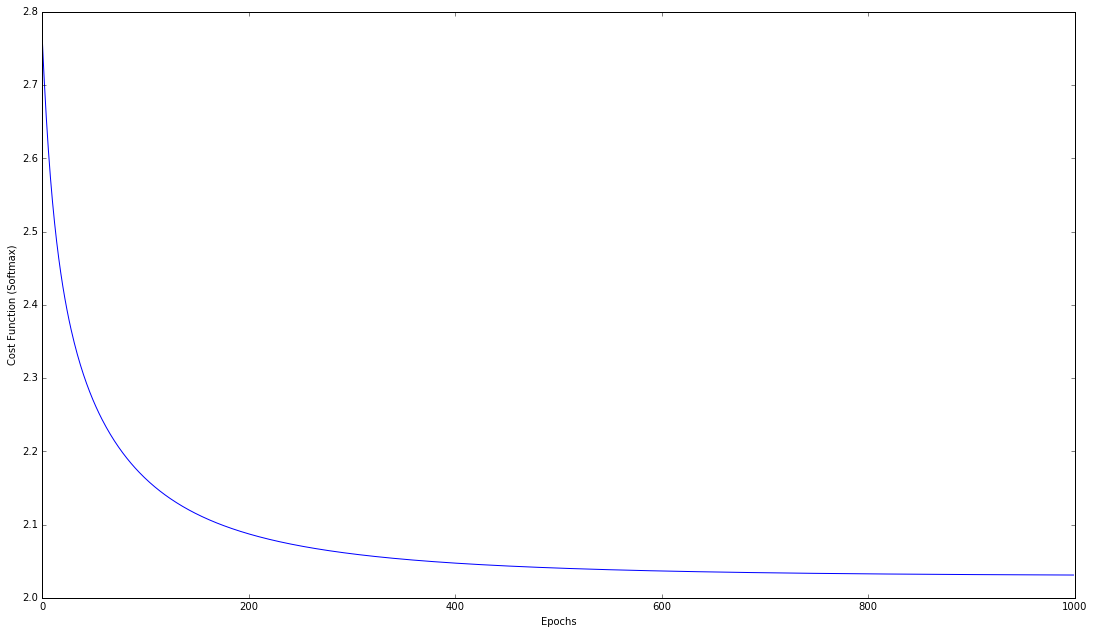

In [38]:
plt.plot(losses)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xlabel('Epochs')
plt.ylabel('Cost Function (Softmax)')
plt.show()

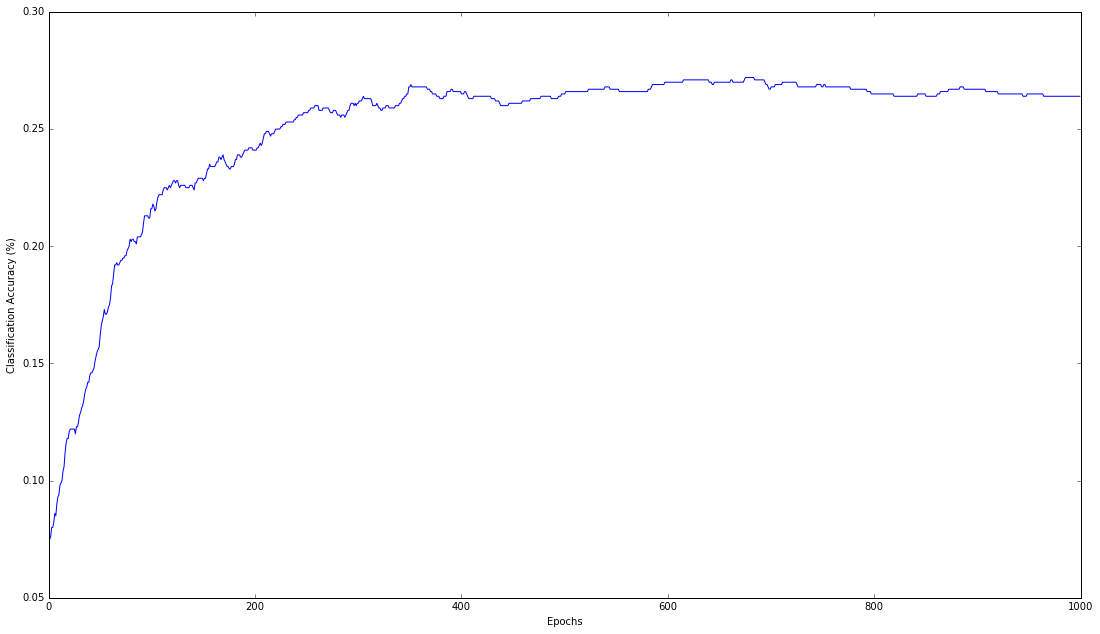

In [48]:
plt.plot(accuracies)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xlabel('Epochs')
plt.ylabel('Classification Accuracy (%)')
plt.show()